# Import Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from kneed import KneeLocator
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
print('Setup Complete!')

Setup Complete!


# Import Data

In [2]:
data = pd.read_csv(r"new_bank_beta.csv")
data

,Unnamed: 0,_id,full_name,age,job,marital,education,default,balance,housing,...,day,month,duration,campaign,pdays,previous,poutcome,LoanID,Transaction_ID,Date
0,0,62b2f15c30306cae600f1fbb,Person 1,59,admin.,married,secondary,no,2343,yes,...,5,may,1042,1,-1,0,unknown,1,1,5-5-2023
1,1,62b306cdc0ae9317470e7430,Person 2,56,admin.,married,secondary,no,45,no,...,5,may,1467,1,-1,0,unknown,2,2,5-5-2023
2,2,62b307df42208f1fd2026224,Person 3,41,technician,married,secondary,no,1270,yes,...,5,may,1389,1,-1,0,unknown,3,3,5-5-2023
3,3,62bc1b9b7a3e3b50f70d8752,Person 4,55,services,married,secondary,no,2476,yes,...,5,may,579,1,-1,0,unknown,4,4,5-5-2023
4,4,62bc21848efe2f8bfd03d132,Person 5,54,admin.,married,tertiary,no,184,no,...,5,may,673,2,-1,0,unknown,5,5,5-5-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11157,6402f6dd1a34e12845084736,Person 11158,33,blue-collar,single,primary,no,1,yes,...,20,apr,257,1,-1,0,unknown,11158,11158,20-4-2023
11158,11158,6402f6fa804272b7fd0cf9fe,Person 11159,39,services,married,secondary,no,733,no,...,16,jun,83,4,-1,0,unknown,11159,11159,16-6-2023
11159,11159,6402f70ecdfb63c3540189f4,Person 11160,32,technician,single,secondary,no,29,no,...,19,aug,156,2,-1,0,unknown,11160,11160,19-8-2023
11160,11160,6402f712804272b7fd0cfa02,Person 11161,43,technician,married,secondary,no,0,no,...,8,may,9,2,172,5,failure,11161,11161,8-5-2023


In [3]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             11162 non-null  object
 1   full_name       11162 non-null  object
 2   age             11162 non-null  int64 
 3   job             11162 non-null  object
 4   marital         11162 non-null  object
 5   education       11162 non-null  object
 6   default         11162 non-null  object
 7   balance         11162 non-null  int64 
 8   housing         11162 non-null  object
 9   loan            11162 non-null  object
 10  contact         11162 non-null  object
 11  day             11162 non-null  int64 
 12  month           11162 non-null  object
 13  duration        11162 non-null  int64 
 14  campaign        11162 non-null  int64 
 15  pdays           11162 non-null  int64 
 16  previous        11162 non-null  int64 
 17  poutcome        11162 non-null  object
 18  LoanID

In [5]:
data['_id'].nunique()

11162

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17652\3503693875.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(list(data['job'].unique()), rotation = 90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17652\3503693875.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(list(data['marital'].unique()), rotation = 90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17652\3503693875.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,2].set_xticklabels(list(data['education'].unique()), rotation = 90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17652\3503693875.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(list(data['default'].unique()), rotation = 90)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17652\3503693875.py:15: UserWarning: FixedFormatter should only be used together with FixedL

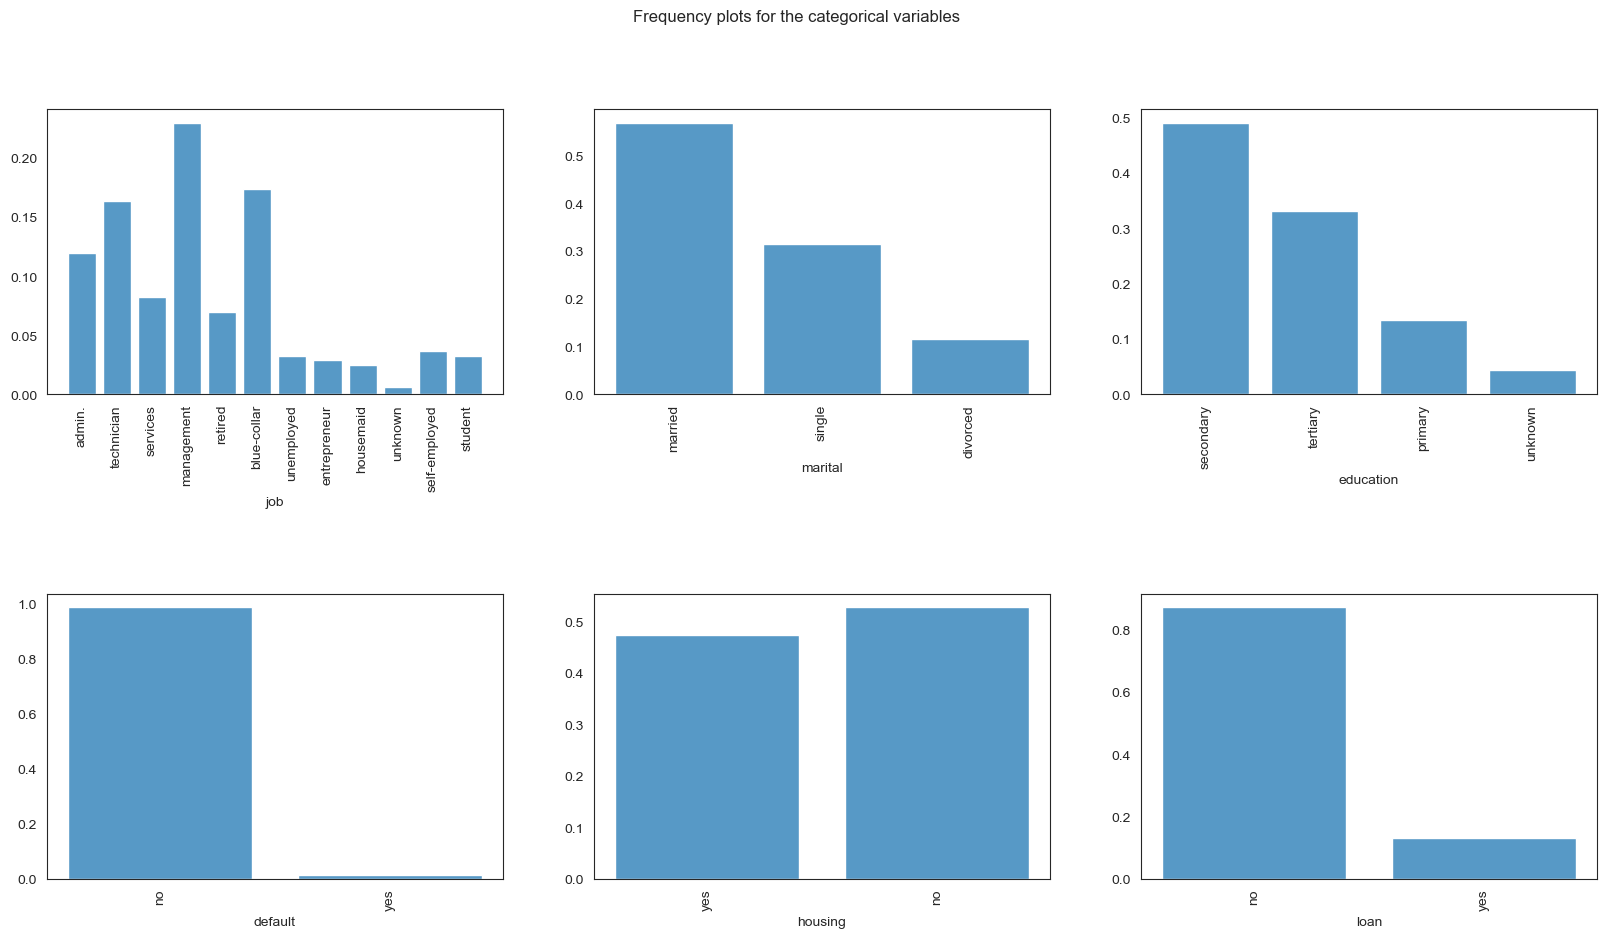

In [6]:
sns.set_style('white')

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = data['job'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,0])
axs[0,0].set_xticklabels(list(data['job'].unique()), rotation = 90)
sns.histplot(x = data['marital'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,1])
axs[0,1].set_xticklabels(list(data['marital'].unique()), rotation = 90)
sns.histplot(x = data['education'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[0,2])
axs[0,2].set_xticklabels(list(data['education'].unique()), rotation = 90)
sns.histplot(x = data['default'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,0])
axs[1,0].set_xticklabels(list(data['default'].unique()), rotation = 90)
sns.histplot(x = data['housing'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,1])
axs[1,1].set_xticklabels(list(data['housing'].unique()), rotation = 90)
sns.histplot(x = data['loan'], multiple="dodge", stat='density', shrink=0.8, common_norm=False, ax=axs[1,2])
axs[1,2].set_xticklabels(list(data['loan'].unique()), rotation = 90)

plt.suptitle('Frequency plots for the categorical variables')

for ax in axs.ravel():
    ax.set_ylabel('')

plt.show()

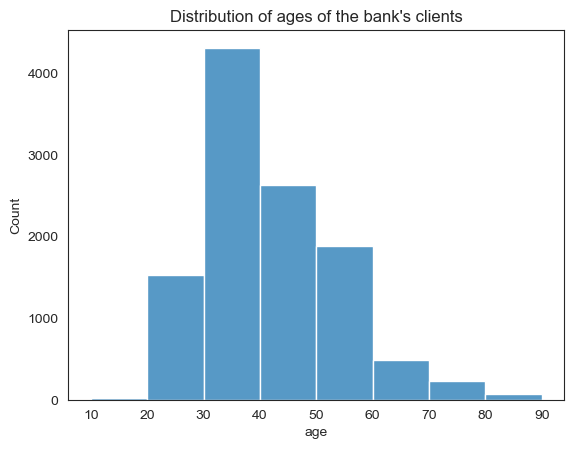

In [7]:
sns.histplot(data=data, x='age', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title("Distribution of ages of the bank's clients")
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.ylabel('Count')
plt.show()

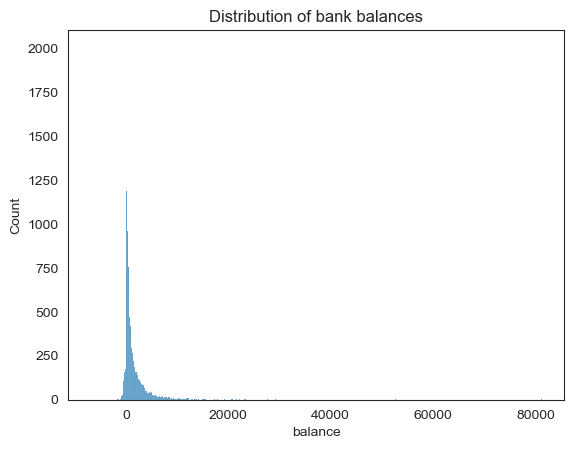

In [8]:
sns.histplot(data=data, x='balance')
plt.title("Distribution of bank balances")
plt.ylabel('Count')
plt.show()

# K-Means

In [9]:
data_cluster = data[['age', 'job', 'marital', 'education', 'balance','default', 'housing', 'loan']]
data_cluster_dump = pd.get_dummies(data_cluster, drop_first= True)
data_cluster_dump

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,59,2343,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,56,45,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,41,1270,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,55,2476,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,54,184,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11158,39,733,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
11159,32,29,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
11160,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [10]:
scaler = MinMaxScaler()
data_cluster_dump = scaler.fit_transform(data_cluster_dump)
data_cluster_dump

array([[0.53246753, 0.10437133, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49350649, 0.07827282, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2987013 , 0.09218521, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.18181818, 0.07809111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32467532, 0.07776175, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.20779221, 0.07776175, 0.        , ..., 0.        , 0.        ,
        0.        ]])

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

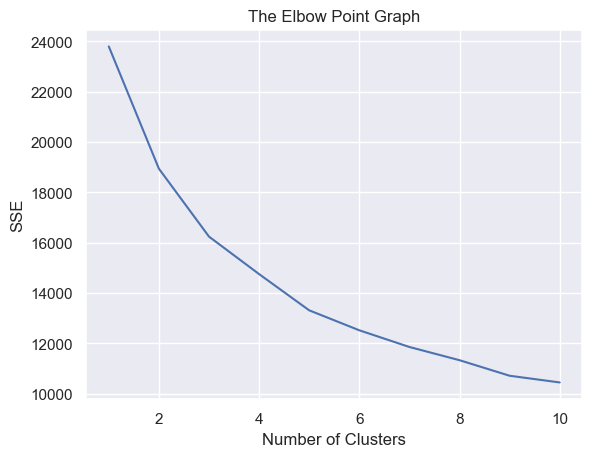

In [11]:
sse = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_cluster_dump)
  sse.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,11), sse)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show();

In [12]:
kn = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing', S=0.1, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 4


In [13]:
kmeans = KMeans(n_clusters= kn.elbow, init='k-means++', random_state=42) 
clusters = kmeans.fit_predict(data_cluster_dump)
data['Cluster'] = clusters
data.head()

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,_id,full_name,age,job,marital,education,default,balance,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,LoanID,Transaction_ID,Date,Cluster
0,62b2f15c30306cae600f1fbb,Person 1,59,admin.,married,secondary,no,2343,yes,no,...,may,1042,1,-1,0,unknown,1,1,5-5-2023,0
1,62b306cdc0ae9317470e7430,Person 2,56,admin.,married,secondary,no,45,no,no,...,may,1467,1,-1,0,unknown,2,2,5-5-2023,0
2,62b307df42208f1fd2026224,Person 3,41,technician,married,secondary,no,1270,yes,no,...,may,1389,1,-1,0,unknown,3,3,5-5-2023,0
3,62bc1b9b7a3e3b50f70d8752,Person 4,55,services,married,secondary,no,2476,yes,no,...,may,579,1,-1,0,unknown,4,4,5-5-2023,0
4,62bc21848efe2f8bfd03d132,Person 5,54,admin.,married,tertiary,no,184,no,no,...,may,673,2,-1,0,unknown,5,5,5-5-2023,2


# Cluster Description

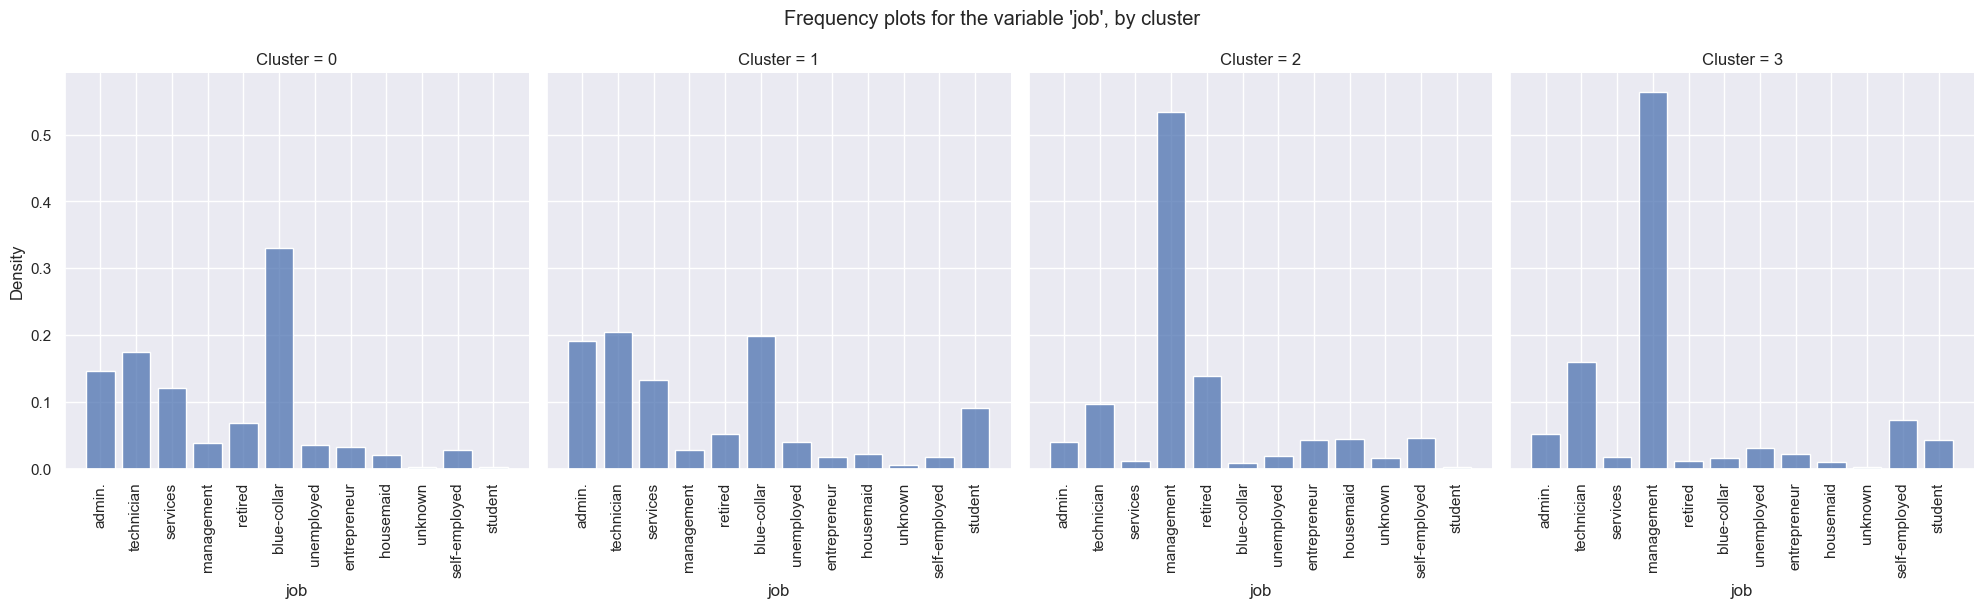

In [14]:
job = sns.displot(data=data, x='job', col='Cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
job.set_xticklabels(rotation=90)
job.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)
plt.show()

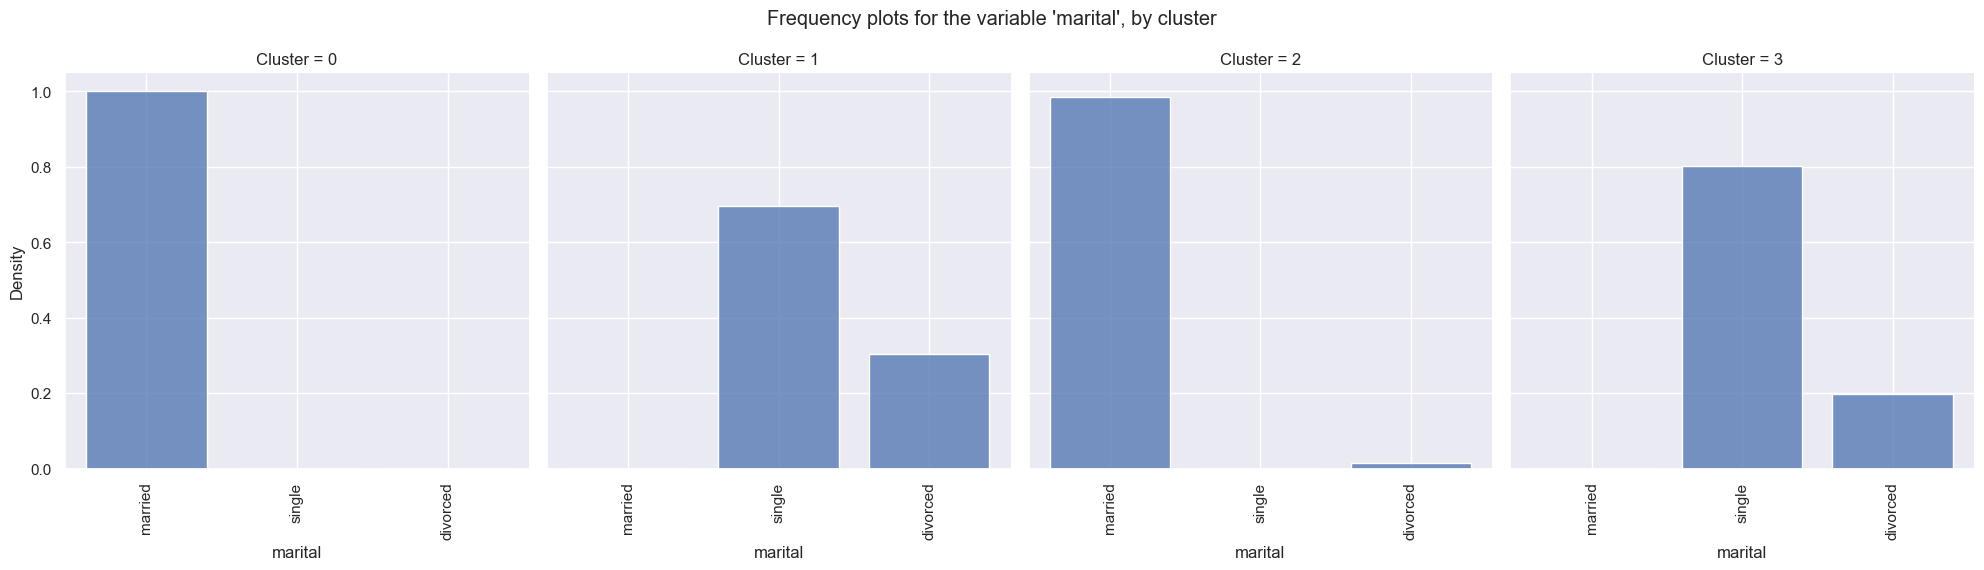

In [15]:
marital = sns.displot(data=data, x='marital', col='Cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
marital.set_xticklabels(rotation=90)
marital.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)
plt.show()

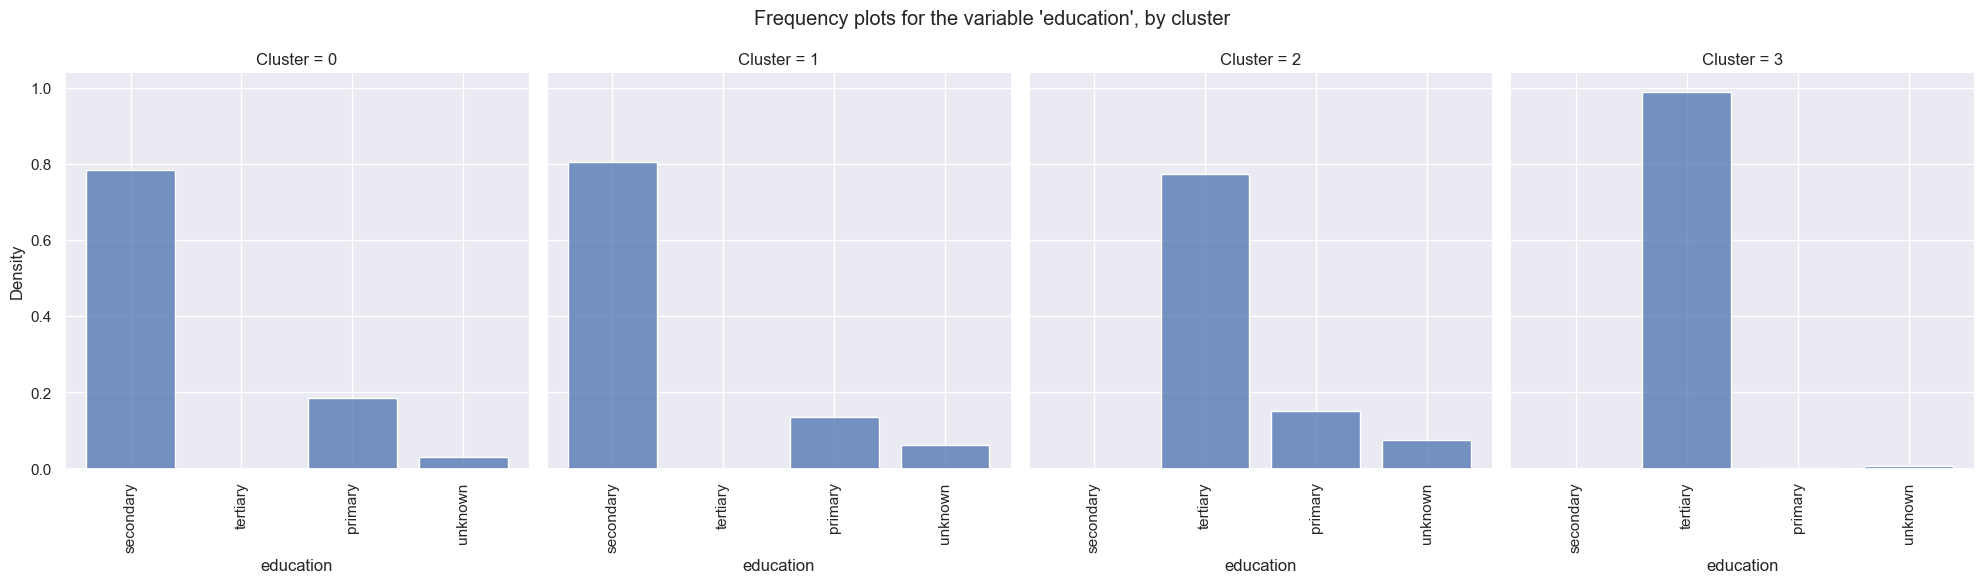

In [16]:
education = sns.displot(data=data, x='education', col='Cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
education.set_xticklabels(rotation=90)
education.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)
plt.show()

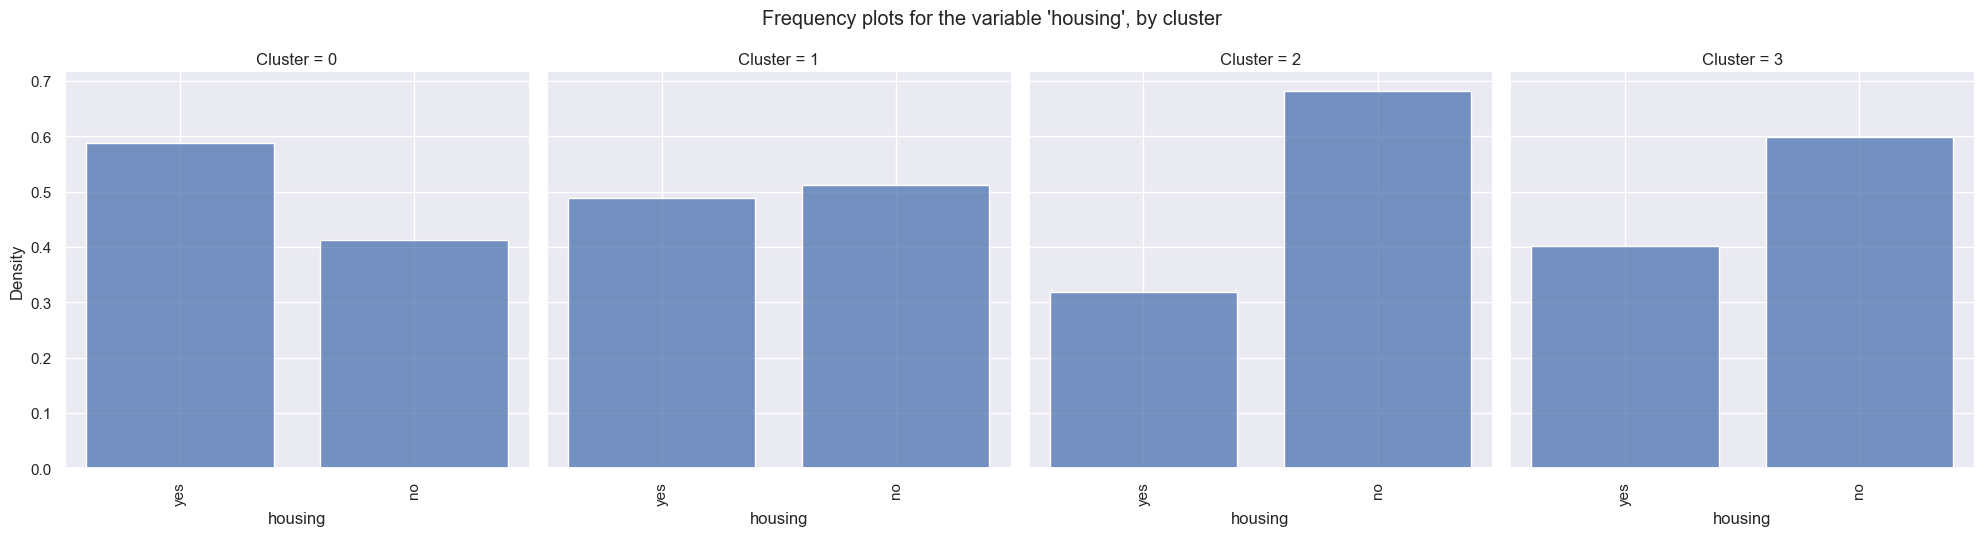

In [17]:
housing = sns.displot(data=data, x='housing', col='Cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
housing.set_xticklabels(rotation=90)
housing.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)
plt.show()

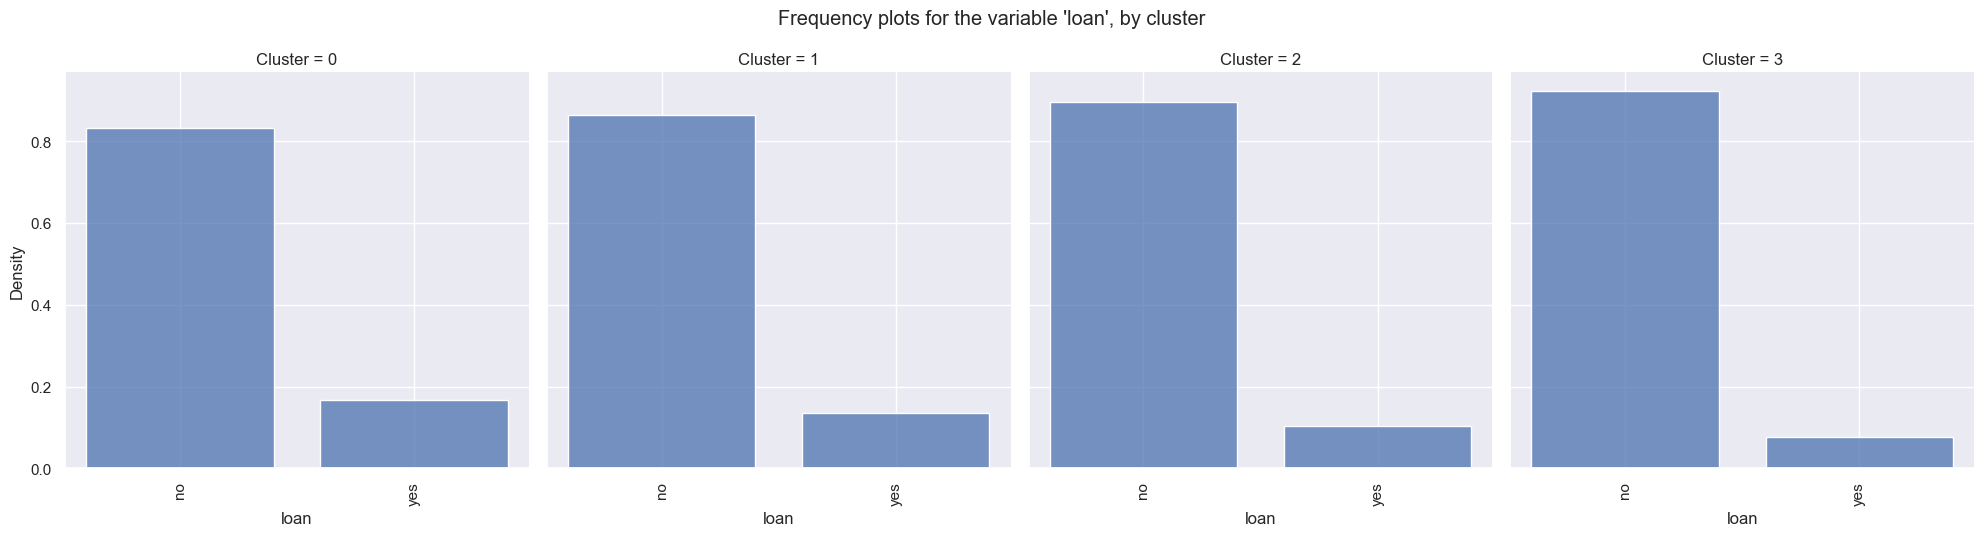

In [18]:
loan = sns.displot(data=data, x='loan', col='Cluster', multiple="dodge", stat='density', shrink=0.8, common_norm=False)
loan.set_xticklabels(rotation=90)
loan.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)
plt.show()

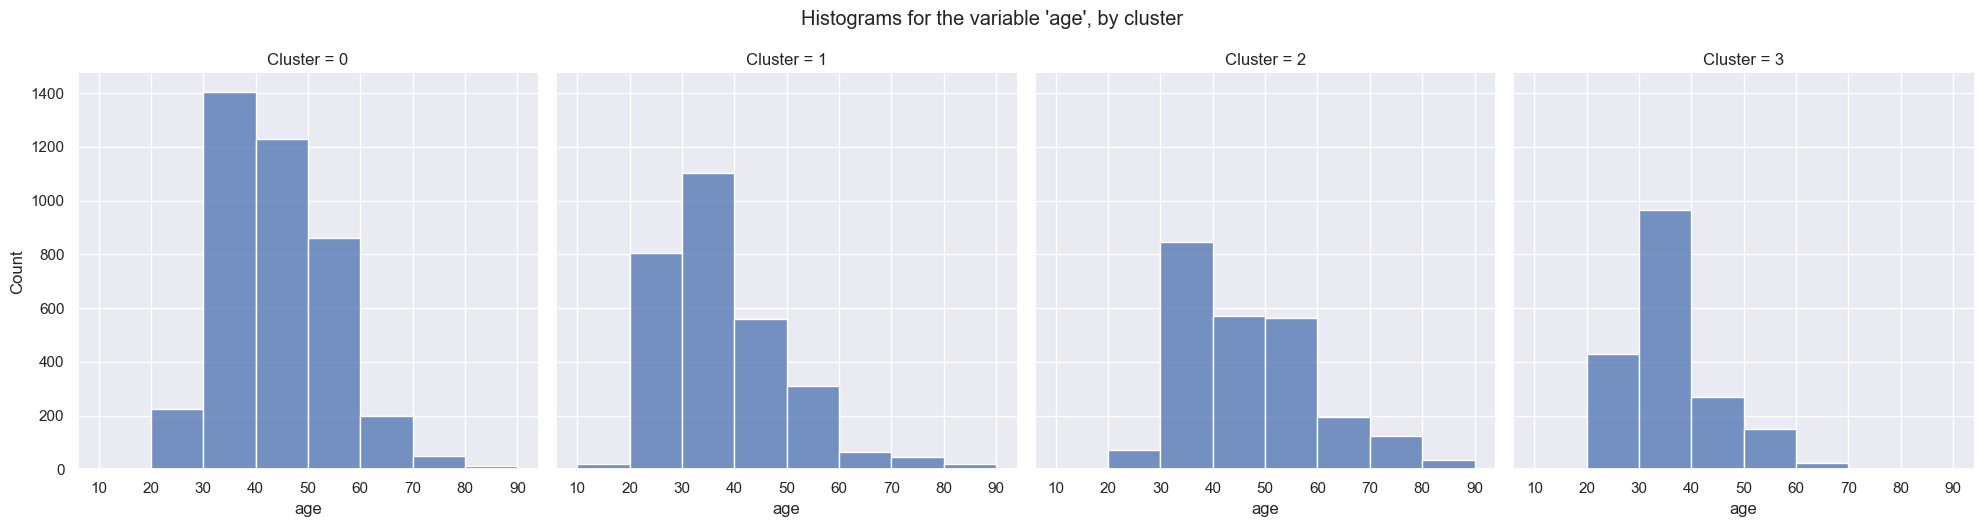

In [19]:
age = sns.displot(data=data, x='age', col='Cluster', bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
age.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)
plt.show()

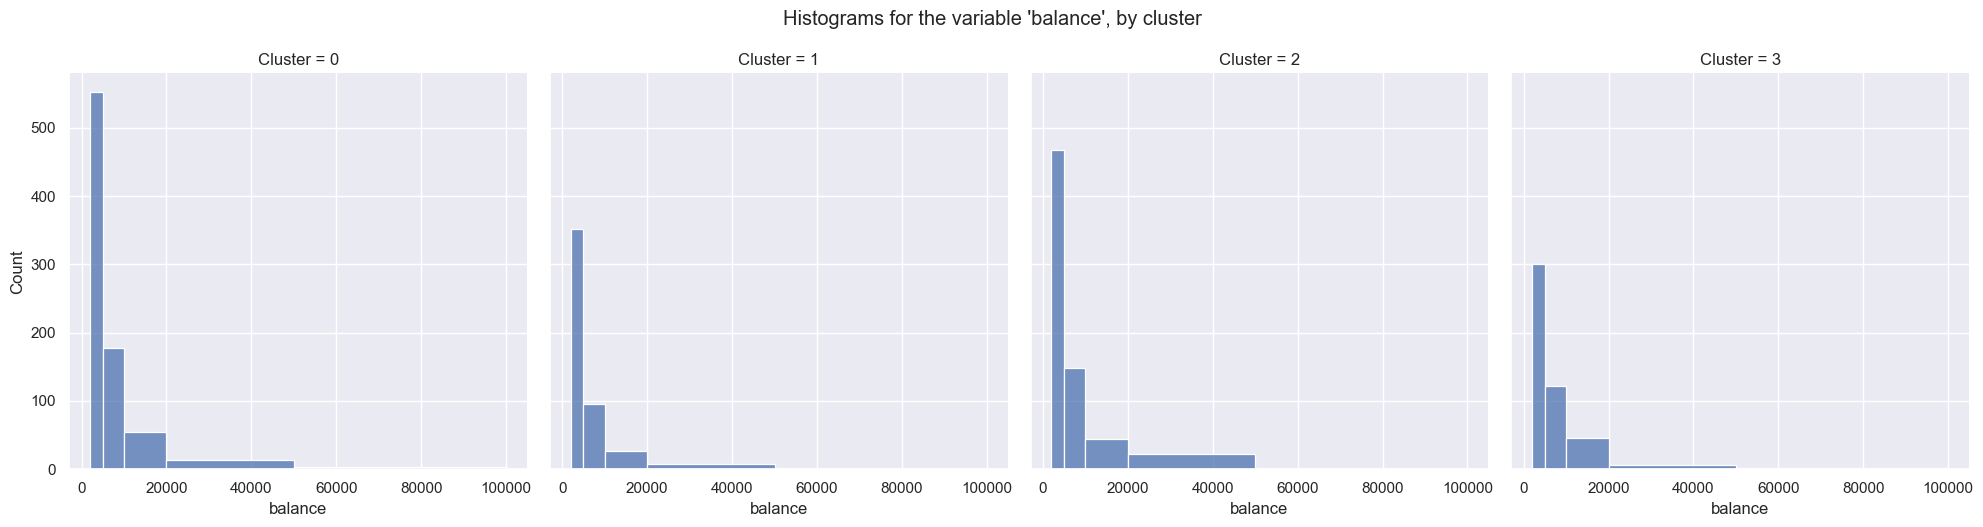

In [20]:
balance = sns.displot(data=data, x='balance', col='Cluster', bins=[2000, 5000, 10000, 20000, 50000, 100000])
balance.fig.suptitle("Histograms for the variable 'balance', by cluster", y=1.05)
plt.show()

In [21]:
data['Segment'] = ''
data.loc[data['Cluster'] == 0, 'Segment'] = 'Công nhân viên lâu năm'
data.loc[data['Cluster'] == 1, 'Segment'] = 'Công nhân viên trẻ'
data.loc[data['Cluster'] == 2, 'Segment'] = 'Nhà quản lý lâu năm'
data.loc[data['Cluster'] == 3, 'Segment'] = 'Nhà quản lý trẻ'

In [23]:
data.to_csv(r"new_bank_segment_beta.csv")